In [1]:
import pandas as pd
import numpy as np

In [2]:
# Save the cvs as a dataframe and remove the rows with null variety
df = pd.read_csv('stopword_filtered.csv')
df = df.dropna(subset=['variety'])
df.isnull().any()

Unnamed: 0     False
_c0            False
country         True
description    False
variety        False
Words          False
filtered       False
dtype: bool

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tfidf = TfidfTransformer()
cv = CountVectorizer().fit_transform(df.filtered)
bagofwords = tfidf.fit_transform(cv)

In [4]:
data = df.values
data[0][4]
y = data[:,4]
len(y)

103320

In [5]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [6]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
len(one_hot_y[0])

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


47

In [7]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
split = train_test_split(bagofwords, encoded_y, test_size = 0.2,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split

In [9]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)

In [10]:
accuracies = []
components = np.int32(np.linspace(2, 20000, 40))

In [ ]:
# loop over the projection sizes
for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
 
    # train a classifier on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

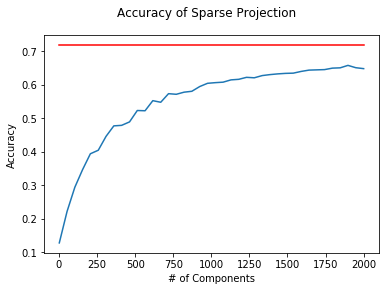

In [15]:
# create the figure
plt.figure()
plt.suptitle("Accuracy of Sparse Projection")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
#plt.xlim([2, 64])
#plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()

In [16]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

In [18]:
# our random projection matrix should have ??? components.
johnson_lindenstrauss_min_dim(103320,eps=0.1)

9896

In [4]:
 len(np.linspace(2, 2000, 40))

40

In [9]:
np.int32(np.linspace(2, 20000, 20))

array([    2,  1054,  2107,  3159,  4212,  5264,  6317,  7369,  8422,
        9474, 10527, 11579, 12632, 13684, 14737, 15789, 16842, 17894,
       18947, 20000], dtype=int32)

In [12]:
SparseRandomProjection(n_components = 2)

SparseRandomProjection(dense_output=False, density='auto', eps=0.1,
            n_components=2, random_state=None)